## Tensorflow Gradient Boosted Trees 

Notebook for showcasing model usage

Visualising trees

In [16]:
# import libraries
import os
import sys
import pandas as pd
import numpy as np
import dtreeviz
import tensorflow_decision_forests as tfdf
import tensorflow as tf
from matplotlib import pyplot as plt
from IPython import display

# avoid "Arial font not found warnings"
import logging
logging.getLogger('matplotlib.font_manager').setLevel(level=logging.CRITICAL)

display.set_matplotlib_formats('retina') # generate hires plots

np.random.seed(1234)  # reproducible plots/data for explanatory reasons

# the models dir contains tf_gbt.py
sys.path.append(os.path.join(os.path.abspath(''), "../models"))
from tf_gbt import GradientBoostedTrees

/var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/ipykernel_6967/1922138582.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


### Model Configurations and Datasets

We wil declare configurations for the model 

In [2]:
data_path = "../data/20231120"

output_path = "../submissions/20231120"

label = 'Transported'

In [3]:
## load train and validation dataset

train_df = pd.read_csv(os.path.join(data_path, "train_ds_pd_2023-11-20_16:49:07.680230.csv"))
valid_df = pd.read_csv(os.path.join(data_path, "valid_ds_pd_2023-11-20_16:49:07.680230.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test_ds_pd_2023-11-20_16:49:53.701846.csv"))

# drop missing values
train_df = train_df.dropna()
valid_df = train_df.dropna()

In [4]:
select_features = ['CryoSleep','Age','RoomService','Cabin_num','FoodCourt', 'ShoppingMall', 'Spa', 'HomePlanet', 'Side', 'Deck', 'Transported', 'VRDeck','Destination']

### Running TensorFlow Gradient Boosted Trees experiments

We will first instantiate the tensorflow GBT model using the predefined configurations and datasets. 

An autotuner will be use selecting the most optimal hyperparameters

In [5]:
gbt = GradientBoostedTrees(train_df=train_df, valid_df=valid_df, test_df=test_df,label=label)
gbt.feature_selection(selected_features=select_features)
gbt.create_tuner(num_trials=50)
gbt.create_gbt_model()

============ Instantiating GBT class ============
============ Pruning Features ============
============ Creating RandomSearch Tuner ============
============ Instantiating GBT model ============
Use /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmpfbn_kl6z as temporary training directory


[WARNING 23-11-20 19:32:59.7984 +08 gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-20 19:32:59.7989 +08 gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-20 19:32:59.7989 +08 gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [6]:
# run experiment
gbt_model_history = gbt.run_experiments()
print(f"Train Model Accuracy: {gbt_model_history.history['accuracy']}")

# evaluate
gbt_model, gbt_model_evaluation, gbt_model_metrics, gbt_model_classification_report = gbt.evaluate()

============ Running Experiment ============
Reading training dataset...
Training tensor examples:
Features: {'CryoSleep': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'Age': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'RoomService': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'Cabin_num': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'FoodCourt': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'ShoppingMall': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'Spa': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>, 'HomePlanet': <tf.Tensor 'data_7:0' shape=(None,) dtype=string>, 'Side': <tf.Tensor 'data_8:0' shape=(None,) dtype=string>, 'Deck': <tf.Tensor 'data_9:0' shape=(None,) dtype=string>, 'VRDeck': <tf.Tensor 'data_10:0' shape=(None,) dtype=float64>, 'Destination': <tf.Tensor 'data_11:0' shape=(None,) dtype=string>}
Label: Tensor("data_12:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'CryoSleep': SemanticTensor(semant

[INFO 23-11-20 19:33:09.9831 +08 kernel.cc:773] Start Yggdrasil model training
[INFO 23-11-20 19:33:09.9831 +08 kernel.cc:774] Collect training examples
[INFO 23-11-20 19:33:09.9831 +08 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-11-20 19:33:09.9833 +08 kernel.cc:393] Number of batches: 7
[INFO 23-11-20 19:33:09.9833 +08 kernel.cc:394] Number of examples: 6123
[INFO 23-11-20 19:33:09.9842 +08 data_spec_inference.cc:305] 1 item(s) have been pruned (i.e. they are considered out of dictionary) for the column Deck (7 item(s) left) because min_value_count=5 and max_number_of_unique_values=2000
[INFO 23-11-20 19:33:09.9847 +08 kernel.cc:794] Trai

Model trained in 0:01:39.667923
Compiling model...
Model compiled.
Train Model Accuracy: [0.807881772518158]
============ Evaluating ============
7/7 [==============================] - 0s 11ms/step


Accuracy metric using validation datasets for evaluation

In [24]:
evaluation_accuracy = gbt_model_evaluation['accuracy']
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {evaluation_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9190


Using sklearn classification report to output common metrics

In [25]:
print(gbt_model_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3072
           1       0.92      0.92      0.92      3051

    accuracy                           0.92      6123
   macro avg       0.92      0.92      0.92      6123
weighted avg       0.92      0.92      0.92      6123



In [26]:
gbt_model_predictions, gbt_model_output = gbt.predict()

============ Predicting ============
5/5 [==============================] - 0s 11ms/step
Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	Age
	Cabin_num
	CryoSleep
	Deck
	Destination
	FoodCourt
	HomePlanet
	RoomService
	ShoppingMall
	Side
	Spa
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.          "Age"  0.307063 ################
    2.    "Cabin_num"  0.260762 ###########
    3.    "CryoSleep"  0.215863 ######
    4.    "FoodCourt"  0.199735 ####
    5.         "Deck"  0.181954 ###
    6.  "RoomService"  0.177032 ##
    7.         "Side"  0.167982 #
    8.   "HomePlanet"  0.164365 #
    9.  "

### Model Visualisations

Training Logs

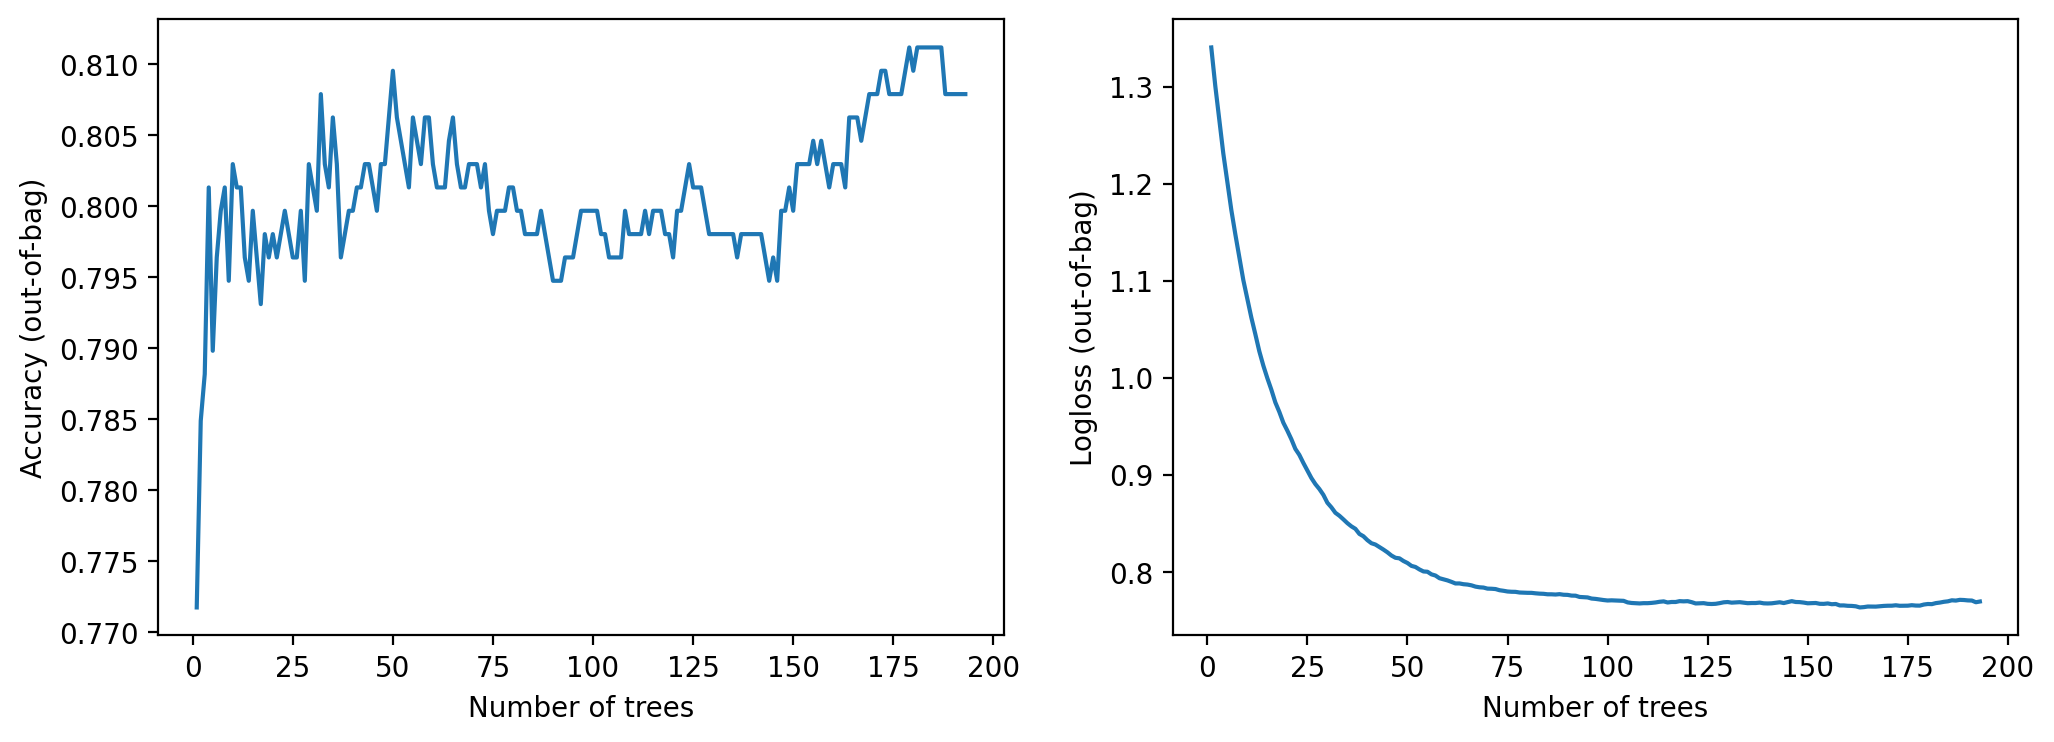

In [27]:
# training logs
gbt_model_training_logs = gbt.plot_training_logs()

Tuning Logs

score                                                -0.763458
evaluation_time                                       25.77519
best                                                      True
split_axis                                      SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                   3.0
sparse_oblique_normalization                STANDARD_DEVIATION
sparse_oblique_weights                              CONTINUOUS
categorical_algorithm                                   RANDOM
growing_strategy                             BEST_FIRST_GLOBAL
max_num_nodes                                            256.0
sampling_method                                         RANDOM
subsample                                                  0.9
shrinkage                                                 0.05
min_examples                                                10
use_hessian_gain                                          true
num_candidate_attributes_ratio                         

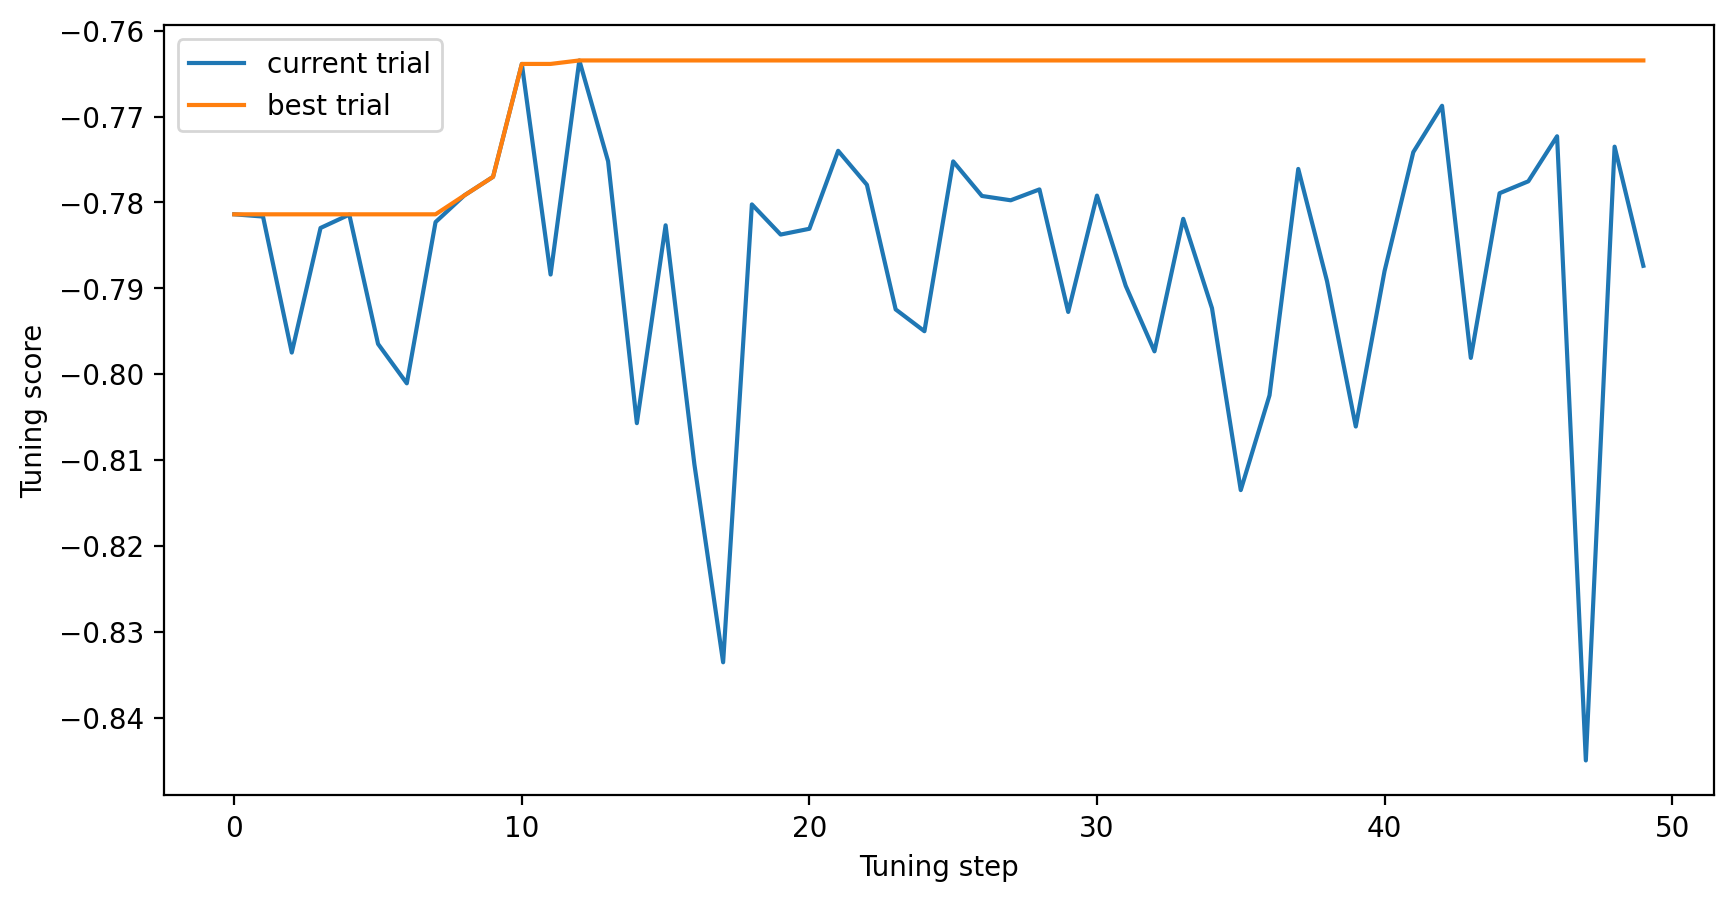

In [28]:
# tuning logs
gbt_model_tuning_logs = gbt.plot_tuning_logs()

Variable Importance

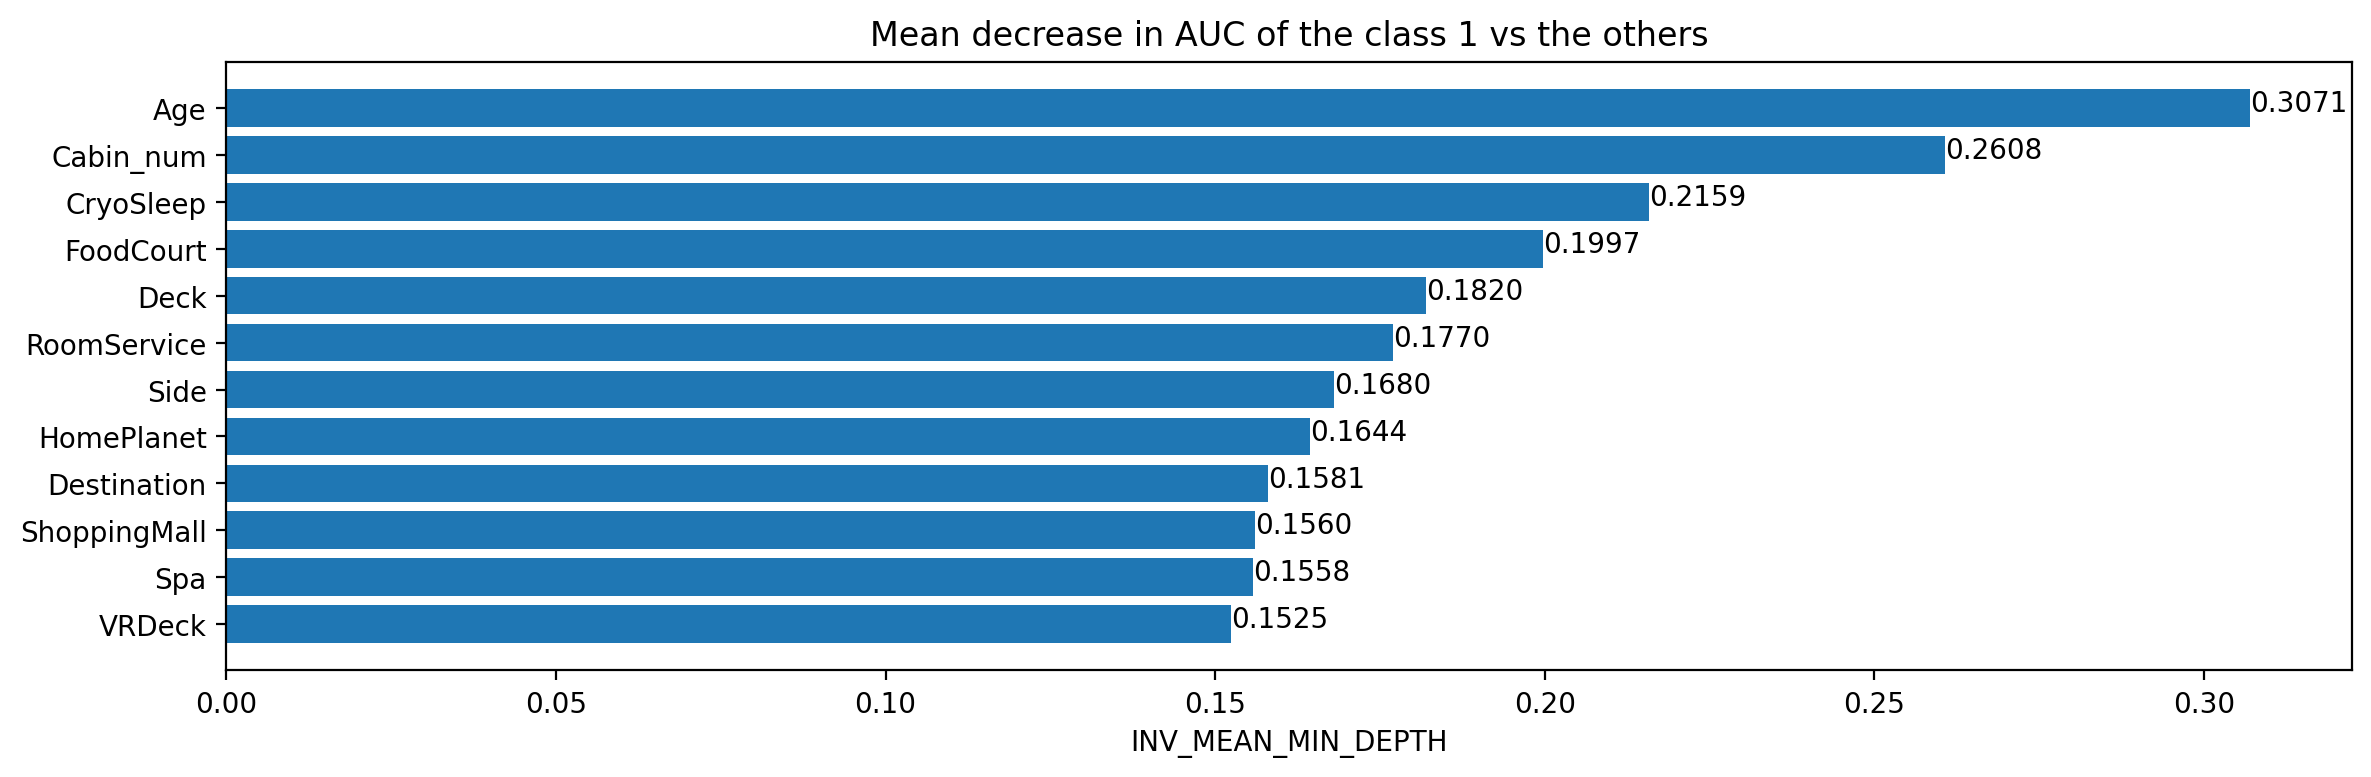

In [29]:
# variable importance
gbt_model_variable_importances = gbt.plot_variable_importances()

### Export output as csv for submission

In [16]:
# os.makedirs(output_path, exist_ok=True) 
# gbt_model_output.to_csv(os.path.join(output_path, "tf_gbt_20231120_2.csv"),index=False)

### dtreeviz Visualisation

In [11]:
features = [f.name for f in gbt_model.make_inspector().features()]


In [18]:
# Let's check the versions:
tfdf.__version__, dtreeviz.__version__  # want dtreeviz >= 2.2.0

('1.6.0', '2.2.2')

In [25]:
viz_gbt_model = dtreeviz.model(gbt_model,
                           tree_index=3,
                           X_train=train_df[features],
                           y_train=train_df[label],
                           target_name=label,
                           class_names=list(train_df[label].unique()))

TypeError: model() missing 1 required positional argument: 'X_train'

In [24]:
viz_gbt_model.view(scale=1.2)

AttributeError: 'NumericalSparseObliqueCondition' object has no attribute 'feature'